In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print("shape of df_train:", df_train.shape)
print("shape of df_test:", df_test.shape)

shape of df_train: (1460, 81)
shape of df_test: (1459, 80)


In [4]:
# display the first 5 rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# display the first 5 rows
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Visualization

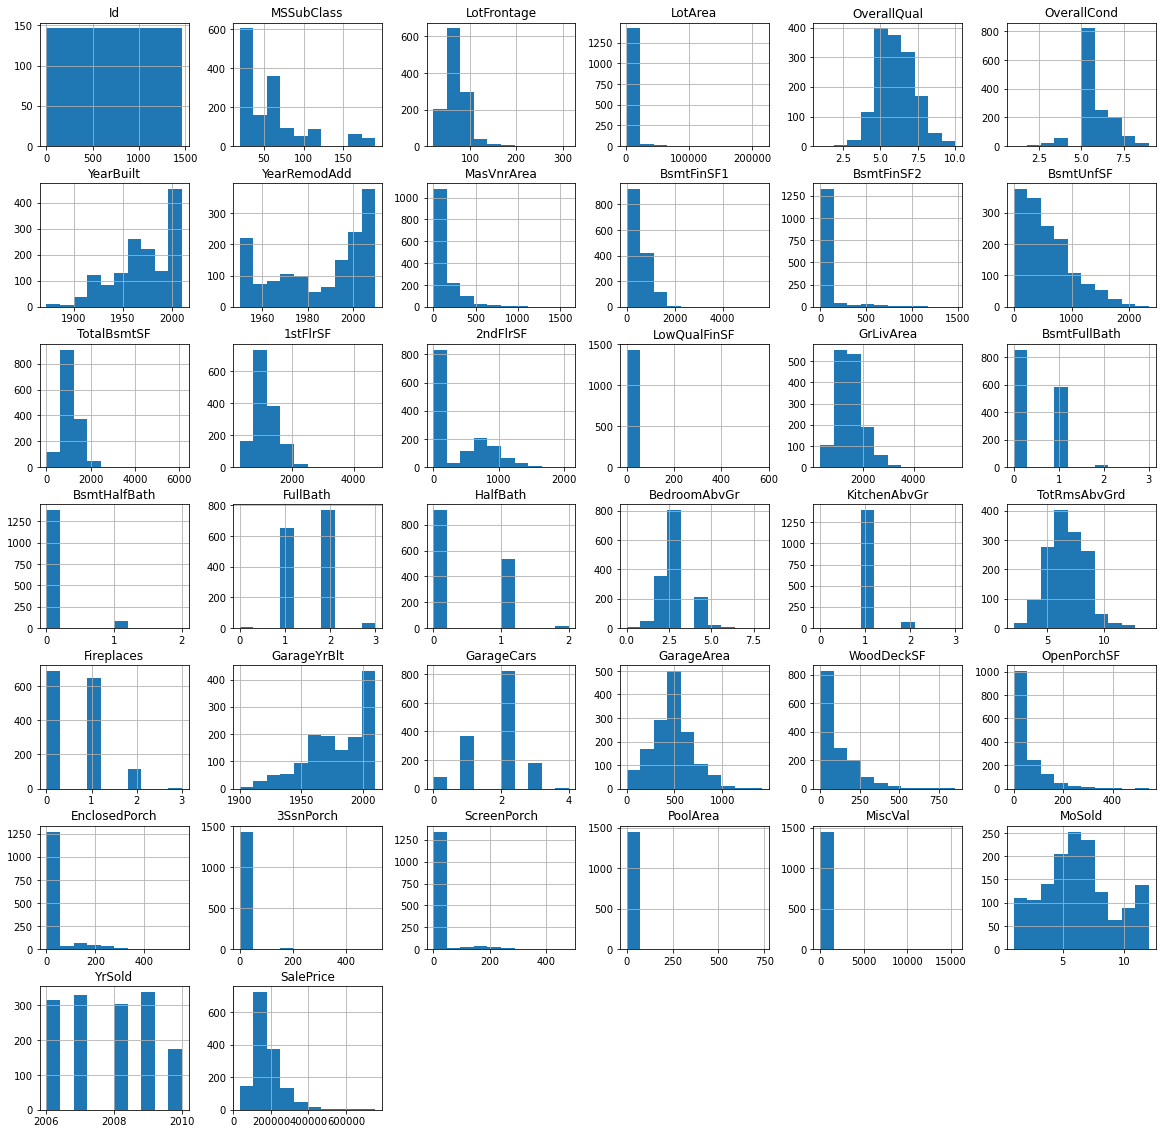

In [7]:
# Histogram
df_train.hist(figsize=(20,20))
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

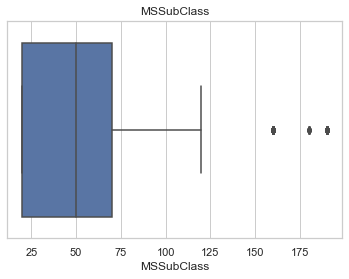

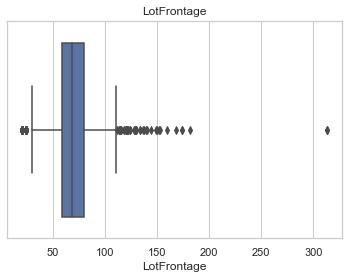

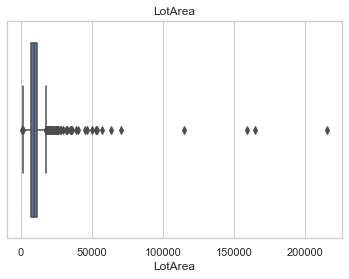

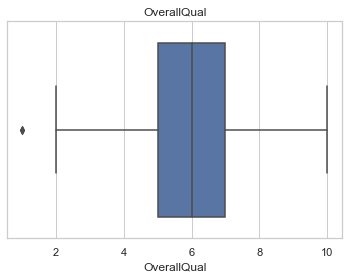

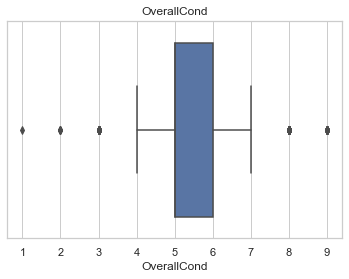

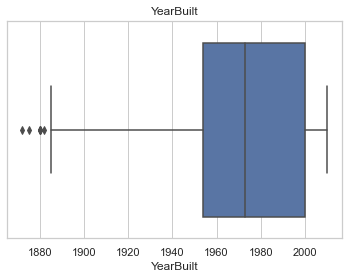

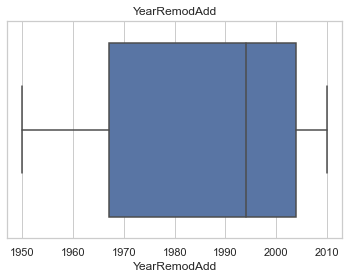

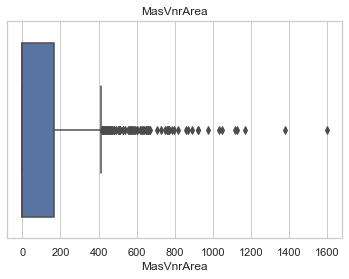

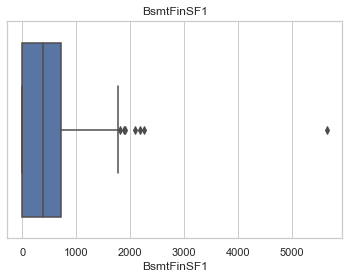

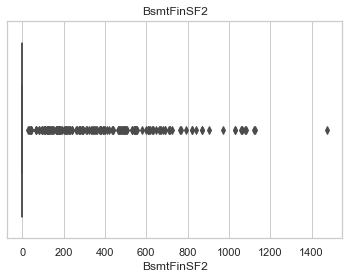

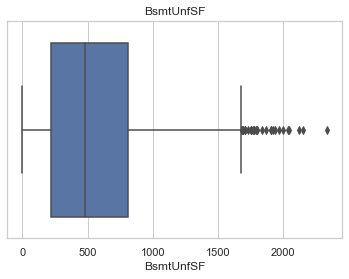

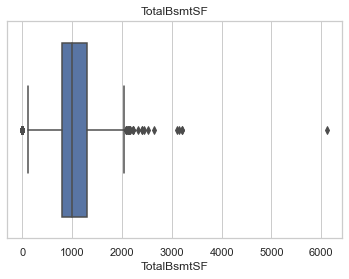

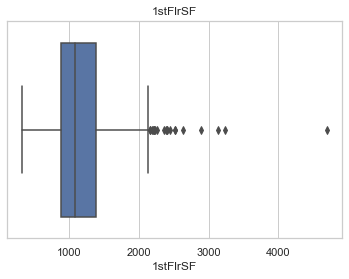

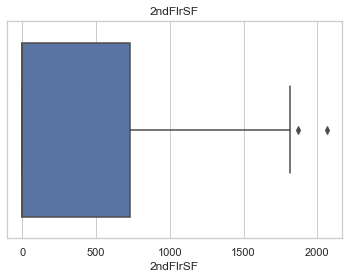

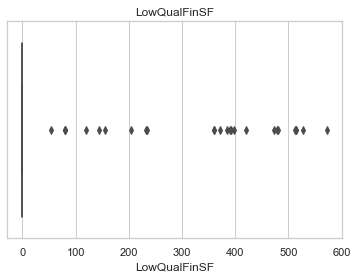

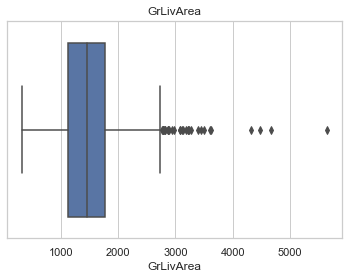

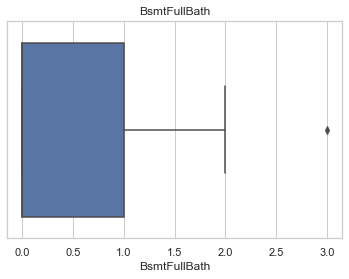

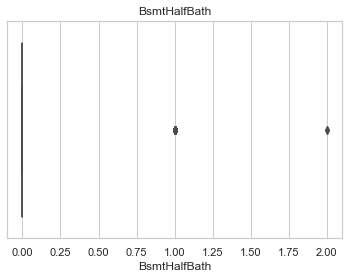

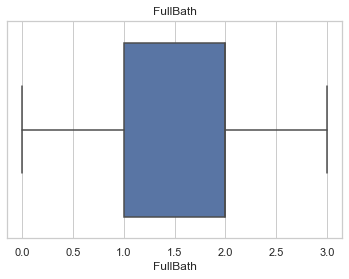

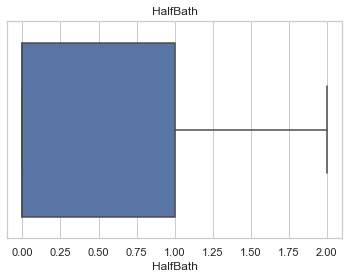

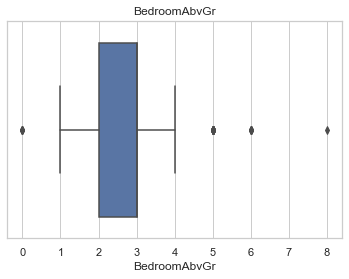

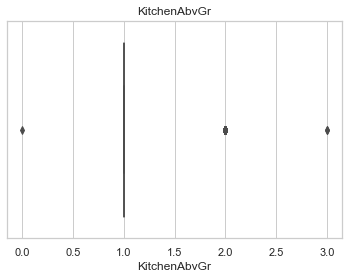

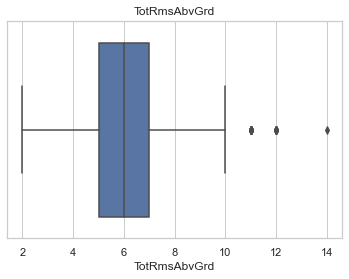

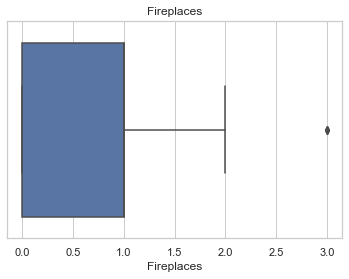

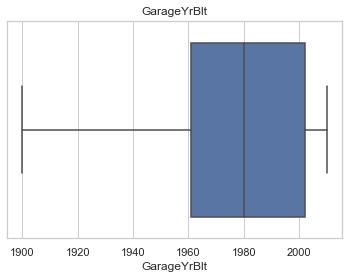

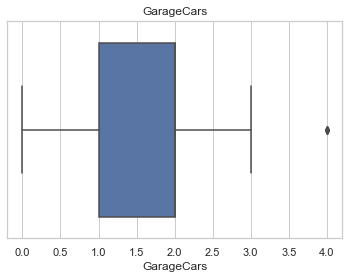

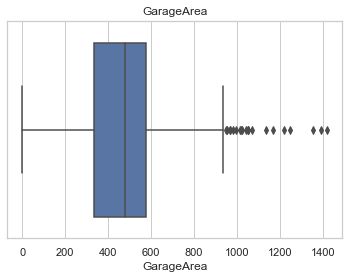

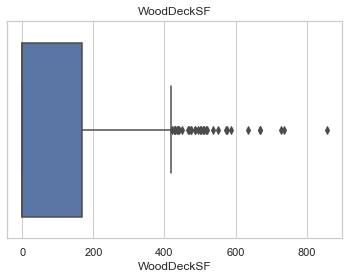

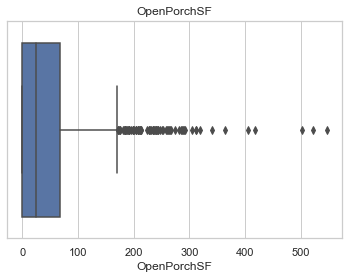

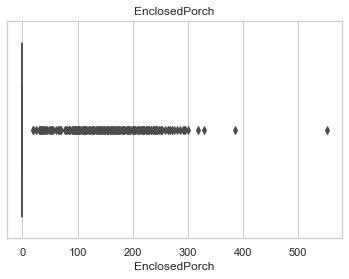

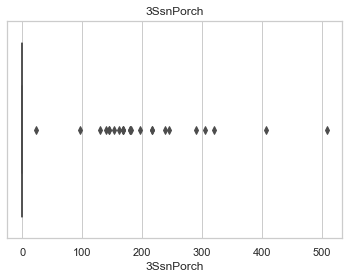

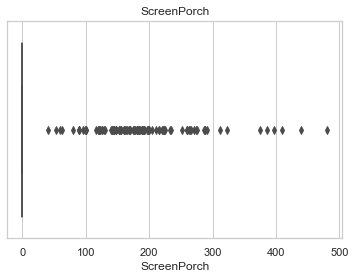

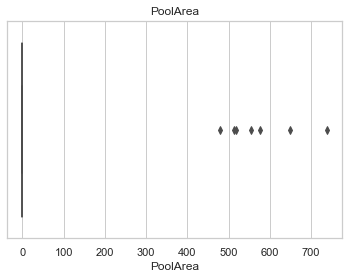

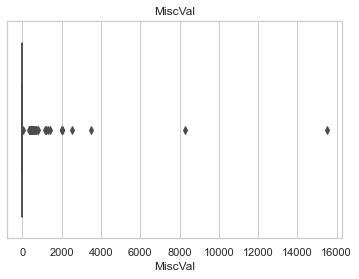

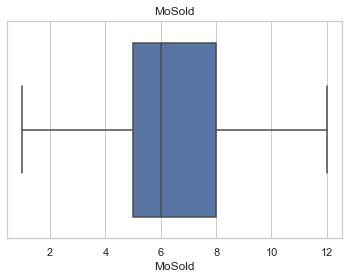

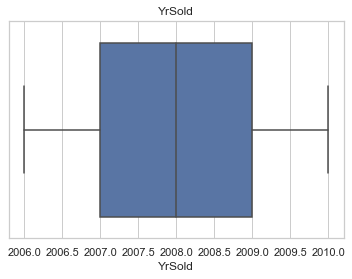

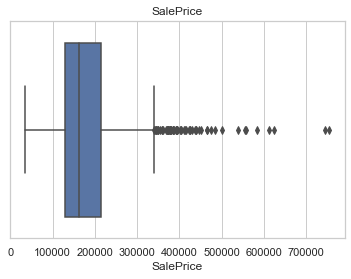

In [8]:
numerical_columns = [column for column in df_train.columns if df_train[column].dtypes != 'object' and column != 'Id']
numerical_df = df_train[numerical_columns]
for column in numerical_df:
    plt.figure(figsize=(6, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column]).set(title=column)

In [9]:
#features present in train data that are not present in test data
feature_train_not_in_test = [col for col in df_train.columns if col not in df_test.columns and col != 'SalePrice']
print(feature_train_not_in_test)

[]


In [10]:
#features present in test data that are not present in train data
feature_test_not_in_train = [col for col in df_test.columns if col not in df_train.columns]
print(feature_test_not_in_train)

[]


## Merge train and test

In [11]:
df = pd.concat([df_train, df_test])

In [12]:
df.shape

(2919, 81)

## Handling Missing Values

## missingValuesCheck() Function

In [13]:
def missingValuesCheck(DataFrame):
    #get the number of missing data points per column
    missing_values = DataFrame.isnull().sum()
    print(missing_values)
    
    # The total missing values 
    total_missing_values = missing_values.sum()

    # The percentage of data that is missing
    total_cells = np.product(DataFrame.shape)
    missing_percentage = total_missing_values / total_cells
    print('---------------------------------------------------')
    print("The percentage of missing values: {:.2f}%".format(missing_percentage * 100))

## Handling Missing Values of Categorical Feature

#### Get a list of all the categorical features that have the keyword 'Qual' OR 'Cond' OR 'Qu' OR 'QC' in the feature name

In [14]:
#Get a list of all the categorical features that have the keyword 'Qual' OR 'Cond' 
#OR 'Qu' OR 'QC' in the feature name
feature_rating_Qual = [col for col in df.columns if 'Qual' in col and df[col].dtype == "object"]
feature_rating_Cond = [col for col in df.columns if 'Cond' in col and col not in ['Condition1', 'Condition2', 'SaleCondition'] and df[col].dtype == "object"]
feature_rating_Qu = [col for col in df.columns if 'Qu' in col and col not in feature_rating_Qual and df[col].dtype == "object"]
feature_rating_QC = [col for col in df.columns if 'QC' in col and df[col].dtype == "object"]
categorical_feature_with_rating = feature_rating_Qual + feature_rating_Cond + feature_rating_Qu + feature_rating_QC

In [15]:
categorical_feature_with_rating

['ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageQual',
 'ExterCond',
 'BsmtCond',
 'GarageCond',
 'FireplaceQu',
 'HeatingQC',
 'PoolQC']

#### Categorical features who have NA as a correct value

In [16]:
categorical_feature_with_legit_na = ['Alley', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'Fence', 'MiscFeature']
df[categorical_feature_with_legit_na].head()

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,NaN,No,GLQ,Unf,Attchd,RFn,NaN,NaN
1,NaN,Gd,ALQ,Unf,Attchd,RFn,NaN,NaN
2,NaN,Mn,GLQ,Unf,Attchd,RFn,NaN,NaN
3,NaN,No,ALQ,Unf,Detchd,Unf,NaN,NaN
4,NaN,Av,GLQ,Unf,Attchd,RFn,NaN,NaN


In [17]:
ordinal_categorical_features = categorical_feature_with_rating + categorical_feature_with_legit_na
df[ordinal_categorical_features].head()

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,Gd,Gd,Gd,TA,TA,TA,TA,NaN,Ex,NaN,NaN,No,GLQ,Unf,Attchd,RFn,NaN,NaN
1,TA,Gd,TA,TA,TA,TA,TA,TA,Ex,NaN,NaN,Gd,ALQ,Unf,Attchd,RFn,NaN,NaN
2,Gd,Gd,Gd,TA,TA,TA,TA,TA,Ex,NaN,NaN,Mn,GLQ,Unf,Attchd,RFn,NaN,NaN
3,TA,TA,Gd,TA,TA,Gd,TA,Gd,Gd,NaN,NaN,No,ALQ,Unf,Detchd,Unf,NaN,NaN
4,Gd,Gd,Gd,TA,TA,TA,TA,TA,Ex,NaN,NaN,Av,GLQ,Unf,Attchd,RFn,NaN,NaN


In [18]:
# Replace missing values with "Missing"
df[ordinal_categorical_features] = df[ordinal_categorical_features].fillna("Missing")

#checking missing values
missingValuesCheck(df[ordinal_categorical_features])

ExterQual       0
BsmtQual        0
KitchenQual     0
GarageQual      0
ExterCond       0
BsmtCond        0
GarageCond      0
FireplaceQu     0
HeatingQC       0
PoolQC          0
Alley           0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
Fence           0
MiscFeature     0
dtype: int64
---------------------------------------------------
The percentage of missing values: 0.00%


#### We will replace the missing values in the remaining categorical features with the mode.

In [19]:
categorical_cols = [cname for cname in df.columns if df[cname].dtypes=='object' and cname!='ind']

remaining_cat_cols = [cname for cname in categorical_cols if cname not in ordinal_categorical_features]

#Handling Missing Values in Categorical features by replacing them with the feature mode value
for col in remaining_cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
df[remaining_cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Y,SBrkr,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,Typ,Y,WD,Normal


In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0


In [22]:
df.shape

(2919, 81)

## Handling Missing Values of Numerical Feature

In [23]:
missingValuesCheck(df)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [24]:
num_feature = [cname for cname in df.columns if df[cname].dtypes != 'object' and cname != 'SalePrice']
df[num_feature] = df[num_feature].fillna(df[num_feature].mean())

In [25]:
missingValuesCheck(df)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Feature Engineering

#### Drop Id Column

In [26]:
df = df.drop(['Id'], axis=1)

### Encoding Categorical Feature

In [27]:
# Encoding
# with missing values, we assign it by 0 
# and the other values: ‘poor’: 1, ‘fair’: 2, ‘average’: 3, ‘good’:4, ‘excellent’: 5
for col in categorical_feature_with_rating:
    if 'Missing' in df[col].value_counts().index:
        df[col] = df[col].map({"Missing": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
    else:
        df[col] = df[col].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

In [28]:
df[categorical_feature_with_rating].head()

,ExterQual,BsmtQual,KitchenQual,GarageQual,ExterCond,BsmtCond,GarageCond,FireplaceQu,HeatingQC,PoolQC
0,4,4,4,3,3,3,3,0,5,0
1,3,4,3,3,3,3,3,3,5,0
2,4,4,4,3,3,3,3,3,5,0
3,3,3,4,3,3,4,3,4,4,0
4,4,4,4,3,3,3,3,3,5,0


#### encode the categorical features that have a valid missing value and follow an order

In [29]:
df[categorical_feature_with_legit_na].head()

,Alley,BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,Fence,MiscFeature
0,Missing,No,GLQ,Unf,Attchd,RFn,Missing,Missing
1,Missing,Gd,ALQ,Unf,Attchd,RFn,Missing,Missing
2,Missing,Mn,GLQ,Unf,Attchd,RFn,Missing,Missing
3,Missing,No,ALQ,Unf,Detchd,Unf,Missing,Missing
4,Missing,Av,GLQ,Unf,Attchd,RFn,Missing,Missing


In [30]:
#Exclude 'Alley', MiscFeature' and 'GarageType' feature as they are not ordinal
df['BsmtExposure'] = df['BsmtExposure'].map({"Missing": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype('int')
df['BsmtFinType1'] = df['BsmtFinType1'].map({"Missing": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}).astype('int')
df['BsmtFinType2'] = df['BsmtFinType2'].map({"Missing": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}).astype('int')
df['GarageFinish'] = df['GarageFinish'].map({"Missing": 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype('int')
df['Fence'] = df['Fence'].map({"Missing": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype('int')

#### There are other features where rank can be applied

In [31]:
df['LotShape'] = df['LotShape'].map({"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4}).astype('int')
df['LandContour'] = df['LandContour'].map({"Low": 1, "HLS": 2, "Bnk": 3, "Lvl": 4}).astype('int')
df['Utilities'] = df['Utilities'].map({"ELO":1,"NoSeWa":2,"NoSewr":3,"AllPub":4}).astype('int')
df['LandSlope'] = df['LandSlope'].map({"Sev": 1, "Mod": 2, "Gtl": 3}).astype('int')
df['CentralAir'] = df['CentralAir'].map({"N": 0, "Y": 1}).astype('int')
df['PavedDrive'] = df['PavedDrive'].map({"N": 0, "P": 1, "Y": 2}).astype('int')

#### encoding on the remaining categorical features

In [32]:
#encoding on the remaining categorical features
remain_cat_feature = [col for col in df.columns if df[col].dtypes=='object' and col != 'ind']
df_dummies = pd.get_dummies(df[remain_cat_feature], drop_first=True)
df.drop(remain_cat_feature, axis=1, inplace=True)
df = pd.concat([df, df_dummies], axis=1)

In [33]:
df.shape

(2919, 206)

In [34]:
df.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Missing,Alley_Pave,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Missing,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,4,4,4,3,7,5,2003,2003,196.0,4,3,4,3,1,6,706.0,1,0.0,150.0,856.0,5,1,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,0,0,2003.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,4,4,4,3,6,8,1976,1976,0.0,3,3,4,3,4,5,978.0,1,0.0,284.0,1262.0,5,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,1,3,1976.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,181500.0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

## Splitting Train and Test

In [35]:
X = df.drop(['SalePrice'], axis=1).values

In [36]:
y = df['SalePrice'].values.reshape(len(df['SalePrice']), 1)

In [37]:
X_train = X[:len(df_train)]
y_train = y[:len(df_train)]

In [38]:
X_test = X[len(df_train):]
y_test = y[len(df_train):]

In [39]:
print("shape of training data:", len(X_train))
print("shape of testing data:", len(X_test))

shape of training data: 1460
shape of testing data: 1459


## Feature Scaling

### Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [42]:
scaled_X = scaler.transform(X_train)

In [43]:
scaled_X.shape

(1460, 205)

In [44]:
scaled_X

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 1.        ,
        0.        ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.18493151, 0.04037019, ..., 0.        , 1.        ,
        0.        ]])

## Training Model

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Using Ridge Regression Model and GridSearchCV

In [46]:
# List of alpha
params_ridge = {
    'alpha': [0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 2.0, 2.1, 3.0, 3.1, 4.0, 4.1, 5.0, 5.1, 6.0, 6.1, 7.0, 7.1]
}
#initalize Ridge Regression model
ridge = Ridge(solver='svd')

In [47]:
grid_ridge = GridSearchCV(estimator=ridge, param_grid=params_ridge, cv=5, return_train_score=True, n_jobs=-1)
grid_ridge.fit(scaled_X, y_train)

GridSearchCV(cv=5, estimator=Ridge(solver='svd'), n_jobs=-1,
             param_grid={'alpha': [0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 2.0,
                                   2.1, 3.0, 3.1, 4.0, 4.1, 5.0, 5.1, 6.0, 6.1,
                                   7.0, 7.1]},
             return_train_score=True)

In [48]:
cv_results = pd.DataFrame(grid_ridge.cv_results_)

## Evaluate The Model

In [49]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.123568,0.023467,0.002461,0.000999,0,{'alpha': 0},-1.555947e+26,-6.566948e+25,-1.879498e+26,-8.359019e+25,-2.787723e+26,-1.543153e+26,7.678878e+25,28,0.914887,0.924832,0.929554,0.918626,0.922800,0.922140,0.005052
1,0.089978,0.006697,0.002628,0.001225,0.0001,{'alpha': 0.0001},8.178787e-02,8.260000e-01,7.748382e-01,8.634018e-01,6.689528e-01,6.429962e-01,2.881249e-01,27,0.920714,0.925881,0.929851,0.923086,0.923687,0.924644,0.003080
2,0.093301,0.009034,0.001796,0.000399,0.001,{'alpha': 0.001},1.023436e-01,8.262314e-01,7.798172e-01,8.632854e-01,6.693950e-01,6.482145e-01,2.806024e-01,26,0.920708,0.925873,0.929840,0.923079,0.923686,0.924637,0.003078
3,0.089171,0.008627,0.002474,0.000447,0.01,{'alpha': 0.01},2.709572e-01,8.276723e-01,8.006859e-01,8.619322e-01,6.709169e-01,6.864329e-01,2.175607e-01,25,0.920290,0.925264,0.929152,0.922561,0.923665,0.924186,0.002964
4,0.086644,0.001452,0.002901,0.001804,0.05,{'alpha': 0.05},6.166124e-01,8.286746e-01,8.187549e-01,8.563305e-01,6.732370e-01,7.587219e-01,9.542281e-02,24,0.915949,0.920161,0.923415,0.918022,0.923571,0.920224,0.002983
5,0.098992,0.004167,0.002412,0.000788,0.1,{'alpha': 0.1},7.548910e-01,8.289944e-01,8.264643e-01,8.524099e-01,6.765187e-01,7.878556e-01,6.454900e-02,23,0.911063,0.915378,0.917986,0.913682,0.923435,0.916309,0.004216
6,0.094504,0.007445,0.002716,0.000716,0.2,{'alpha': 0.2},8.384299e-01,8.300179e-01,8.351447e-01,8.494222e-01,6.826110e-01,8.071251e-01,6.258111e-02,22,0.904949,0.909997,0.911827,0.908835,0.923090,0.911739,0.006106
7,0.097485,0.009643,0.002174,0.000667,0.3,{'alpha': 0.3},8.647673e-01,8.309424e-01,8.407556e-01,8.487656e-01,6.878895e-01,8.146241e-01,6.432853e-02,21,0.901316,0.906971,0.908248,0.906127,0.922676,0.909068,0.007197
8,0.097739,0.021243,0.002161,0.000682,0.4,{'alpha': 0.4},8.765877e-01,8.316761e-01,8.447988e-01,8.489140e-01,6.924984e-01,8.188950e-01,6.486918e-02,20,0.898816,0.904938,0.905728,0.904288,0.922217,0.907197,0.007894
9,0.128036,0.031361,0.002195,0.000747,0.5,{'alpha': 0.5},8.830015e-01,8.322648e-01,8.478395e-01,8.493840e-01,6.965675e-01,8.218115e-01,6.477227e-02,19,0.896920,0.903419,0.903758,0.902884,0.921732,0.905743,0.008378


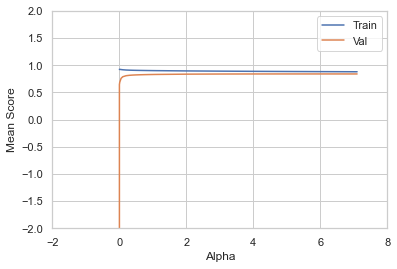

In [50]:
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.legend(['Train', 'Val'])
plt.grid(True)
plt.axis([-2, 8, -2, 2])
plt.show()

In [51]:
ridge = grid_ridge.best_estimator_

In [52]:
grid_ridge.best_estimator_

Ridge(alpha=6.0, solver='svd')

In [53]:
print("R-squared of training dataset: {:.2f} %".format(ridge.score(scaled_X, y_train) * 100))

R-squared of training dataset: 87.98 %


#### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [54]:
print("Mean squared error of training dataset: {}".format(mean_squared_error(np.log(y_train), np.log(ridge.predict(scaled_X)))))
print("Root Mean squared error of training dataset: {}".format(np.sqrt(mean_squared_error(np.log(y_train), np.log(ridge.predict(scaled_X))))))

Mean squared error of training dataset: 0.017502655317168176
Root Mean squared error of training dataset: 0.13229760132809731


## Predictions On Testing Data

In [58]:
X_test = scaler.transform(X_test)

In [59]:
predictions = ridge.predict(X_test)

## Export Testing Data Prediction

In [61]:
# Save test predictions to file
output = pd.DataFrame({'Id': df_test.Id.values,
                       'SalePrice': predictions.reshape(len(predictions))})
output.to_csv('submission.csv', index=False)

## Reference:
1. https://parisrohan.medium.com/top-3-rank-kaggle-house-prices-advanced-regression-techniques-using-bagging-ensemble-ff2a3f9b70cb

2. https://opendatascience.com/transforming-skewed-data-for-machine-learning/?fbclid=IwAR3eSU5RHp9m4Xm0gma48e-Bys69Ipqki2ZVZUQzRFF_vjPBgjDE0_T-UDI